In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/onlineretail/OnlineRetail.csv


Importing Necessary Modules
We import all the modules that we are going to use in this code.

1) Pandas for handling our .csv file & converting it to a usable DataFrame

2) Warnings to filter out all the unnecessary warning messages

3) Matplotlib  for showing our visualizations using different available plots

4) Lifetimes packages for our model development.

In [25]:
import pandas as pd
import matplotlib as plt


Importing all the neccessary packages in the given notebook

In [26]:

#Import Data
data=pd.read_csv(r"../input/onlineretail/OnlineRetail.csv", encoding="cp1252")


In the read_csv() we use the particular datafile in .csv format ,additionally we are using encoding parameter which ensures the conversion of unknown encoding of the data into a functional data.

About the encoding follow this article - https://docs.python.org/3/library/codecs.html#standard-encodings<br>
The dataset is downloaded from - https://www.kaggle.com/vijayuv/onlineretail/download

In [27]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


data.head() gives the output of the top 5 rows of the dataframe.

In [28]:
#Check the shape (number of columns ,rows) in the dataset
data.shape

(541909, 8)

data.shape defines the numbers of rows and the numbers of columns
from the above output we can see that there are 541909 rows of data whereas 8 columns of particular data.

The following details of the code is given here - https://www.geeksforgeeks.org/python-pandas-df-size-df-shape-and-df-ndim/

In [29]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


data.describe() describes the different statistical quantities such as <br>
count = which describes the no. of data of rows in the data for a particular column .<br>
mean = Mean of the values for a particular column.<br>
max = Maximum of the values in the object.<br>
min = Minimum of the values in the object in the particular<br> 
std = Standard deviation of the observations.<br>
and also the 25%, 50% and 75% returns the 25th, 50th, and 75th percentiles of the data.



The comphrensive details of the following code given here - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [30]:
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


It is similar as the above code being difference is that the parameter which has a include value which indicates it takes all the column as categorical values and the numeric values. 

In [31]:
#Find out missing values
data.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Here we define find the number of values of data which is nullcharacter,these can occur due to mistyping or wrong data entry of the data.<br>
axis = (0 or ‘index’, 1 or ‘columns’), the value is default 0<br>
   If 0 or ‘index’ counts are generated for each column. If 1 or ‘columns’ counts are generated for each row.

The details of the following code is given here - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html

In [32]:
#Remove time from date
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format="%m/%d/%Y %H:%M").dt.date

In the Invoicedata column the data in each row has time and date. We are not sure of the use of time in our analysis so will be removing time from the given customer's purchaae date. <br>
The to_datatime() takes values from InvoiceDate column and formats takes value in the given particular format and returns numpy array of python datetime.date objects . 

Details about the to_datatime and other related topics is given here -https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html<br>


In [33]:
#There are 135,080 missing values in the CustomerID column, and since our analysis is based on customers, 
#we will remove these missing values from the CustomerID column.
data = data[pd.notnull(data['CustomerID'])]

Detect non-missing values for an array-like object for the column 'CustomerID'

This function takes a scalar or array-like object and indictates whether values are valid

The details of the above code is given here - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.notnull.html

In [34]:
#Keeping records with non negative quantity
data = data[(data['Quantity']>0)]

keeping the values of the column 'Quantity' positive as we don't want any absurd value is out of scope. Here data['Quantity']>0 filters out the negative or absurd value .

In [35]:
#Add a new column depicting total sales
data['Total_Sales'] = data['Quantity'] * data['UnitPrice']     #Total sales = (Quantity of particular prod.) * (Unitprice of prod.) 
necessary_cols = ['CustomerID', 'InvoiceDate', 'Total_Sales']  #taking only three given columns for our analysis
data = data[necessary_cols]

1st l.o.c. describes the column 'total sales' which is found by multiplying each value of Quantity and UnitPrice

For our analysis we require three important features i.e. customerid, invoicedata and total_sales and we feed into a single column new column for our easy convenience.

In [36]:
data.head() #shows the first 5 rows of the dataset

,CustomerID,InvoiceDate,Total_Sales
0,17850.0,2010-12-01,15.30
1,17850.0,2010-12-01,20.34
2,17850.0,2010-12-01,22.00
3,17850.0,2010-12-01,20.34
4,17850.0,2010-12-01,20.34


Here we define the order of our new dataframe by head()

In [37]:
#Printing numbers of unique Customer IDs
print(data['CustomerID'].nunique())

4339


Now we check the number of unique values in the column customerID in order to replace the duplicate values from the data with the function nunique().

The details about the above function is given here - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html

In [38]:
last_order_date = data['InvoiceDate'].max() #its checks the Last order date
print(last_order_date)
print("--------------------------------------")
print(data[(data['CustomerID']==12346)]) #it gives the details of the particular customerID with index no. 

2011-12-09
--------------------------------------
       CustomerID InvoiceDate  Total_Sales
61619     12346.0  2011-01-18      77183.6


1st l.o.c defines last date of the transaction from the column 'InvoiceDate" by the function max() which returns the highest value from the column

2nd line of code "(data[(data['CustomerID']==12346)" defines the particular row and the column "CustomerID" which has the value "12346" and retuens the whole row.

For this analysis we will be using BG/NBD model which stands for Beta Geometric/Negative Binomial Model.<br>
We will be importing lifetimes package here is the documentation-https://lifetimes.readthedocs.io/en/latest/lifetimes.fitters.html#module-lifetimes.fitters.pareto_nbd_fitter

In [39]:
pip install Lifetimes

Note: you may need to restart the kernel to use updated packages.


In order to download all the packages of lifetmes we use the following command. Using pip install lifetimes which download all the packages

In [40]:
from lifetimes.plotting import *
from lifetimes.utils import *
#importing the necessary packages

From the lifetimes.plotting ww will be importing all the packages which is used for plotting or visualization of the given data file and also the utility libraries which includes are the given models for the prediction of the model<br>


In [41]:

data = summary_data_from_transaction_data(data, 'CustomerID', 'InvoiceDate', monetary_value_col='Total_Sales', observation_period_end='2011-12-9')
data.reset_index().head()

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,325.0,0.000000
1,12347.0,6.0,365.0,367.0,599.701667
2,12348.0,3.0,283.0,358.0,301.480000
3,12349.0,0.0,0.0,18.0,0.000000
4,12350.0,0.0,0.0,310.0,0.000000


Built-in utility functions from lifetimes package to transform the transactional data (one row per purchase) into summary data (a frequency, recency, age and monetary).<br>
For all models, the following nomenclature is used:<br>
• **frequency** represents the number of repeat purchases the customer has made. This means that it’s one less
than the total number of purchases. This is actually slightly wrong. It’s the count of time periods the customer
had a purchase in. So if using days as units, then it’s the count of days the customer had a purchase on.<br>
• **T** represents the age of the customer in whatever time units chosen (weekly, in the above dataset). This is equal
to the duration between a customer’s first purchase and the end of the period under study.<br>
• **recency** represents the age of the customer when they made their most recent purchases. This is equal to the
duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase,
the recency is 0.)<br>
• **monetary_value** represents the average value of a given customer’s purchases. This is equal to the sum of
all a customer’s purchases divided by the total number of purchases. Note that the denominator here is different
than the frequency described above.<br>


In [42]:
print(data['frequency'].describe())


count    4339.000000
mean        2.864024
std         5.952745
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       131.000000
Name: frequency, dtype: float64


The code describes the statistical analysis of the particular column 'frequency' with all the mean, std(standard deviation), min, max, etc which gives the overall overview of the column.

In [43]:
one_time_buyers = round(sum(data['frequency'] == 0)/float(len(data))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

Percentage of customers purchase the item only once: 35.7 %


This percentage gives us the percentage of one time buyers which is almost 1/3 rd of the total buyers.

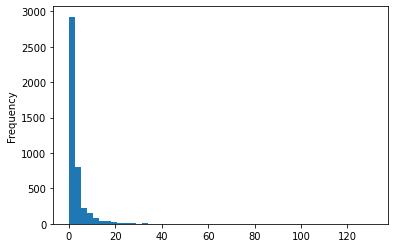

In [44]:

#Create histogram to find out how many customers purchased item only once.
data['frequency'].plot(kind='hist', bins=50)

About the BG/NBD Model read from here-https://lifetimes.readthedocs.io/en/latest/Quickstart.html#estimating-customer-lifetime-value-using-the-gamma-gamma-model

In [45]:
#Frequency/Recency Analysis Using the BG/NBD Model
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data['frequency'], data['recency'], data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 68.89, b: 6.75, r: 0.83>


We’ll use the BG/NBD model first. There are other models which we will explore in these docs, but this is the simplest
to start with.<br>
After fitting, we have lots of nice methods and properties attached to the fitter object, like param_ and summary.
For small samples sizes, the parameters can get implausibly large, so by adding an l2 penalty the likelihood, we can
control how large these parameters can be. This is implemented as setting as positive penalizer_coef in the
initialization of the model. In typical applications, penalizers on the order of 0.001 to 0.1 are effective.

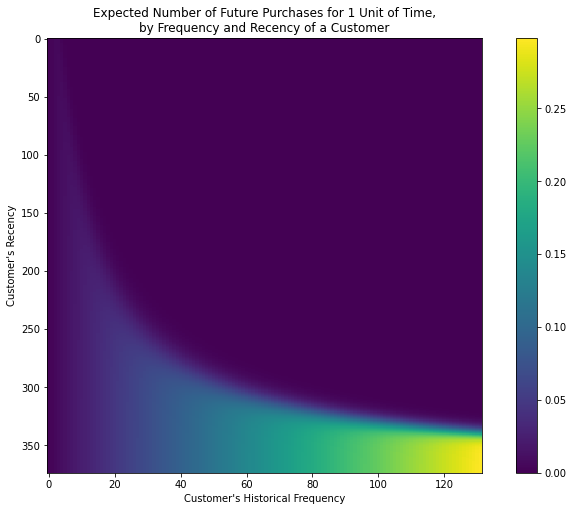

In [46]:
#Visualizing our frequency/recency matrix
%matplotlib inline
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

Consider: a customer bought from you every day for three weeks straight, and we haven’t heard from them in months.
What are the chances they are still “alive”? Pretty small. On the other hand, a customer who historically buys
from you once a quarter, and bought last quarter, is likely still alive. We can visualize this relationship using the
Frequency/Recency matrix, which computes the expected number of transactions a artificial customer is to make in
the next time period, given his or her recency (age at last purchase) and frequency (the number of repeat transactions
he or she has made).


We can see that if a customer has bought 120 times from you, and their latest purchase was when they were 330 weeks
old (given the individual is 330 weeks old), then they are your best customer (bottom-right). Your coldest customers
are those that are in the top-right corner: they bought a lot quickly, and we haven’t seen them in weeks.<br>
There’s also that beautiful “tail” around (20,250). That represents the customer who buys infrequently, but we’ve seen
him or her recently, so they might buy again - we’re not sure if they are dead or just between purchases.



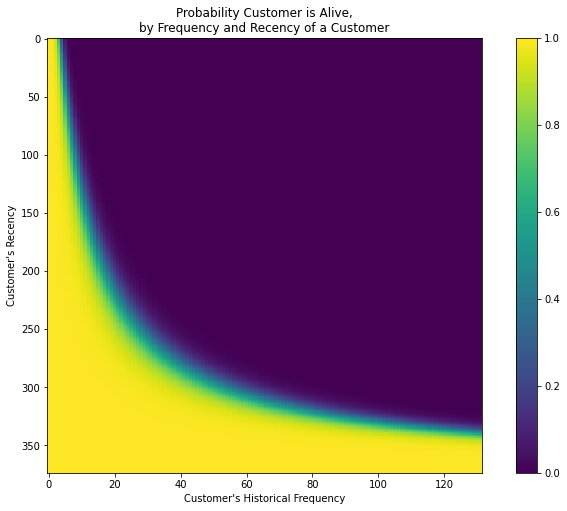

In [47]:
#predict if the customers are surely alive:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

Another interesting matrix to look at is the probability of still being alive:

In [48]:
#Predict future transaction in next 10 days i.e.top 10 customers that the model expects them to make purchases 
#in the next 10 days, based on historical data

t = 10
data['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, data['frequency'], data['recency'], data['T']),2)
data.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,CustomerID,frequency,recency,T,monetary_value,pred_num_txn
0,14911.0,131.0,372.0,373.0,1093.661679,2.98
1,12748.0,113.0,373.0,373.0,298.360885,2.58
2,17841.0,111.0,372.0,373.0,364.452162,2.53
3,15311.0,89.0,373.0,373.0,677.729438,2.03
4,14606.0,88.0,372.0,373.0,135.890114,2.01
5,12971.0,70.0,369.0,372.0,159.211286,1.61
6,13089.0,65.0,367.0,369.0,893.714308,1.50
7,14527.0,53.0,367.0,369.0,155.016415,1.23
8,13798.0,52.0,371.0,372.0,706.650962,1.20
9,16422.0,47.0,352.0,369.0,702.472340,1.09


Let’s return to our customers and rank them from “highest expected purchases in the next period” to lowest. Models
expose a method that will predict a customer’s expected purchases in the next period using their history<br>
Great, we can see that the customer who has made 131 purchases, and bought very recently from us, is probably going
to buy again in the next period.

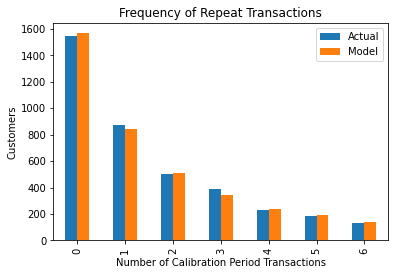

In [49]:
#Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

Ok, we can predict and we can visualize our customers’ behaviour, but is our model correct? There are a few ways
to assess the model’s correctness. The first is to compare your data versus artificial data simulated with your fitted
model’s parameters.<br>
We can see that our actual data and our simulated data line up well. This proves that our model doesn’t create problem.

In [50]:
#Customer's future transaction prediction for next 10 days

t = 10
individual = data.loc[14911]
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

#OBSERVATION: Our model predicts that customer 14911’s future transaction is appx 3 in 10 days.

2.9830238639021625

Here we predict the future transcation of the customer i'd = "14911" and we found out that it will be close to 3 transactions in next 10 days

In [51]:
#Check if there is correlation between monetary value and frequency in order to use gamma gamma model for CLV calculation by pearson coeff.
data[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.046161
frequency,0.046161,1.000000


The model we are going to use to estimate the CLV for our userbase is called the Gamma-Gamma submodel, which
relies upon an important assumption. The Gamma-Gamma submodel, in fact, assumes that there is no relationship
between the monetary value and the purchase frequency. In practice we need to check whether the Pearson correlation
between the two vectors is close to 0 in order to use this model.


In [52]:
#Shortlist customers who had at least one repeat purchase with the company. 
shortlisted_customers = data[data['frequency']>0]
print(shortlisted_customers.head().reset_index())
print("-----------------------------------------")
print("The Number of Returning Customers are: ",len(shortlisted_customers))

   CustomerID  frequency  recency      T  monetary_value  pred_num_txn
0     12347.0        6.0    365.0  367.0      599.701667          0.16
1     12348.0        3.0    283.0  358.0      301.480000          0.09
2     12352.0        6.0    260.0  296.0      368.256667          0.19
3     12356.0        2.0    303.0  325.0      269.905000          0.07
4     12358.0        1.0    149.0  150.0      683.200000          0.08
-----------------------------------------
The Number of Returning Customers are:  2790


For this whole time we didn’t take into account the economic value of each transaction and we focused mainly on
transactions’ occurrences. To estimate this we can use the Gamma-Gamma submodel. But first we need to create
summary data from transactional data also containing economic values for each transaction (i.e. profits or revenues).


About the gamma gamma model read here-https://lifetimes.readthedocs.io/en/latest/Quickstart.html#estimating-customer-lifetime-value-using-the-gamma-gamma-model

In [53]:
#Train gamma-gamma model by taking into account the monetary_value.
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(shortlisted_customers['frequency'],
        shortlisted_customers['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>


At this point we can train our Gamma-Gamma submodel and predict the conditional, expected average lifetime value
of our customers.

In [54]:
#After applying Gamma-Gamma model, now we can estimate average transaction value for each customer. 
print(ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']
    ).head(10))

CustomerID
12346.0    416.917667
12347.0    569.988807
12348.0    333.762672
12349.0    416.917667
12350.0    416.917667
12352.0    376.166864
12353.0    416.917667
12354.0    416.917667
12355.0    416.917667
12356.0    324.008941
dtype: float64


We can now estimate the average profit of each of these customers

In [55]:
data['pred_txn_value'] = round(ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']), 2)
data.reset_index().head()

,CustomerID,frequency,recency,T,monetary_value,pred_num_txn,pred_txn_value
0,12346.0,0.0,0.0,325.0,0.000000,0.02,416.92
1,12347.0,6.0,365.0,367.0,599.701667,0.16,569.99
2,12348.0,3.0,283.0,358.0,301.480000,0.09,333.76
3,12349.0,0.0,0.0,18.0,0.000000,0.10,416.92
4,12350.0,0.0,0.0,310.0,0.000000,0.02,416.92


Here we calculate the CLV score for the top customers

In [56]:
data['CLV'] = round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    data['frequency'],
    data['recency'],
    data['T'],
    data['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
), 2)


data.sort_values(by='CLV', ascending=False).head(10).reset_index()

,CustomerID,frequency,recency,T,monetary_value,pred_num_txn,pred_txn_value,CLV
0,14646.0,44.0,353.0,354.0,6366.705909,1.06,6213.28,222128.93
1,18102.0,25.0,367.0,367.0,9349.477200,0.59,8951.86,178895.33
2,16446.0,1.0,205.0,205.0,168469.600000,0.07,78051.29,175531.47
3,17450.0,26.0,359.0,367.0,7404.690385,0.62,7105.09,147476.62
4,14096.0,16.0,97.0,101.0,4071.434375,0.99,3823.47,127589.20
5,14911.0,131.0,372.0,373.0,1093.661679,2.98,1087.70,109442.13
6,12415.0,15.0,313.0,337.0,7860.210000,0.39,7323.92,96290.23
7,14156.0,42.0,362.0,371.0,2787.081667,0.97,2723.13,89410.33
8,17511.0,27.0,371.0,373.0,3305.060741,0.63,3185.63,67660.41
9,16029.0,38.0,335.0,373.0,2034.808421,0.88,1986.70,58729.62


In [57]:
#Calculate Customer Lifetime Value
data['CLV'] = round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    data['frequency'],
    data['recency'],
    data['T'],
    data['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
), 2)

data.drop(data.iloc[:, 0:6], inplace=True, axis=1)

data.sort_values(by='CLV', ascending=False).head(10).reset_index()

,CustomerID,CLV
0,14646.0,222128.93
1,18102.0,178895.33
2,16446.0,175531.47
3,17450.0,147476.62
4,14096.0,127589.20
5,14911.0,109442.13
6,12415.0,96290.23
7,14156.0,89410.33
8,17511.0,67660.41
9,16029.0,58729.62
